$\newcommand\indi[1]{{\mathbf 1}_{\displaystyle #1}}$
$$\newcommand\inde[1]{{\mathbf 1}_{\displaystyle\left\{ #1 \right\}}}$$
$$\newcommand{\ind}{\inde}$$
$\newcommand\E{{\mathbf E}}$
$\renewcommand\P{{\mathbf P}}$
$\newcommand\Cov{{\mathrm Cov}}$

# Le calcul du prix d'une option "américaine''

## 1. Le cas européen (calcul d'espérance)

On considère le  modèle de Cox-Ross:
$$
X_0=x_0, X_{n+1}= X_{n} \left(d\inde{U_{n+1}=P}+u\inde{U_{n+1}=F}\right).
$$
On choisit les valeurs numériques de la façon suivante
$$
   x_0=100, r_0=0,1, \sigma=0,3.
$$
et l'on définit $p$, $r$, $u$ et $d$ en fonction de $N$ de la façon suivante~:
$$
p=1/2,\;r=r_0/N,\;u=1+\frac{\sigma}{\sqrt{N}}\; \mbox{ et }\; d=1-\frac{\sigma}{\sqrt{N}}.
$$
On cherche à évaluer $\E(f(N,X_N))$ où 
$$
 f(N,x)=\frac{1}{(1+r)^N}\max(K-x,0),
$$
avec $K=x_0=100$ et $r=0,05$.

__Question 1.1.__ Calculer ces prix d'options européennes (call et put) se ramène
  à des calculs d'espérance d'une fonction d'une chaîne de Markov. On
  implémente ici la méthode de calcul d'espérance par ''programmation
  dynamique''.

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd


def prix_eu(x_0,r,u,d,p,N,gain):
# Calcul du prix européen à l'instant 0

    U=np.zeros([N+1,N+1])
    # U[n,k] = u(n,x^n_k) avec x^n_k = x_0 * u**k * d**(n-k)
    
    # la condition finale en N
    for k in range(0,N+1): # range(0,N+1) = 0,1,2 ... , N
        U[N,k] = gain(x_0 * u**k * d**(N-k))/(1+r)**N;
    #le temps décroît de N-1 à 0
    for n in range(N-1,-1,-1): # range(N-1,-1,-1) = {N-1,N-2,...,0} !
        for k in range(n+1):
        # écrire l'équation de programmation dynamique
        # U[n,k] = u(n,x^n_k) avec x^n_k = x_0 * u**k * d**(n-k)
        
        ######  A vous de jouer  .....

    return U[0,0]

def prix_eu_n(n,x_0,r,u,d,p,N,gain):
# Calcul du prix a l'instant n

    # Pour calculer ce prix on ne change rien si ce n'est N en N-n
    return prix_eu(x_0,r,u,d,p,N-n,gain)

 On peut vérifier que lorsque $p=1/2$ (ou $r=0$) et $K=x_0$ le prix
  des puts et des calls coïncident.  On le vérifie.
  
  Pour le choix classique
  $p=(1+r-d)/(u-d)$ (et $r\not=0$), les prix sont différents, ce que
  l'on vérifie aussi.

In [2]:
def main_1():
    r_0=0.05;sigma=0.3;
    N=50;
    d=1-sigma/math.sqrt(N);u=1+sigma/math.sqrt(N);
    r=r_0/N;

    x_0=100;K=100;

    # Lorsque p=1/2 et K=x_0 le prix du call = le prix du put (exercice!)
    p=1/2;K=x_0;
    
    def gain_put(x): return max(K-x,0) # Payoff du put  
    def gain_call(x): return max(x-K,0) # Payoff du call 

    p_put  = prix_eu_n(0,x_0,r,u,d,p,N,gain_put);
    p_call = prix_eu_n(0,x_0,r,u,d,p,N,gain_call);
    if (abs(p_put - p_call) >= 0.000001) :
        print("WARNING: ces deux prix devrait coincider: ",p_put," <> ",p_call)
    else:
        print("Les deux prix coincident: ",p_put," <> ",p_call,end='')
        print(". Parfait!");

    p= (1+r-d)/(u-d)
    print("Prix du call : ",prix_eu_n(0,x_0,r,u,d,p,N,gain_call))
    print("Prix du put : ",prix_eu_n(0,x_0,r,u,d,p,N,gain_put))

In [3]:
main_1()

Les deux prix coincident:  11.402142946815882  <>  11.40214294681589. Parfait!
Prix du call :  14.285050131985198
Prix du put :  9.410369101110671


## 2. Le cas américain (arrêt optimal)

On s'intéresse au cas d'un option américaine qui promet (en valeur actualisée en $0$), si on l'exerce à l'instant $n$
pour une valeur de $X_n$ valant $x$, une valeur $f(n,x)$
$$
   f(n,x) = \frac{1}{(1+r)^n}\max(K-x,0).
$$
On cherche à calculer son prix donné par 
$$
u(0,x_0)=\sup_{\tau \mbox{ t.a.} \leq N} \E(f(\tau,X_\tau)).
$$
On sait (voir le cours) que $u$ se calcule grace à l'équation de programmation dynamique suivante
 \begin{equation}\label{eq:rec} 
    \left\{
      \begin{array}{l}
        u(n,x) = \displaystyle \max\left[p u(n+1,xu)+(1-p) u(n+1,xd),\frac{1}{(1+r)^n}(K-x)_+\right], n<N, x\in E\\
        u(N,x) = \frac{1}{(1+r)^N}(K-x)_+,  x\in E.
      \end{array}
    \right.   
  \end{equation}

__Question 2.1__ On pose $v(n,x)=(1+r)^n u(n,x)$. Vérifier que $v$ est solution de 
 
 $$
    \left\{
      \begin{array}{l}
        v(n,x) = \displaystyle \max\left[\frac{p v(n+1,xu)+(1-p) v(n+1,xd)}{1+r},(K-x)_+\right], n<N, x\in E\\
        v(N,x) = (K-x)_+,  x\in E.
      \end{array}
    \right.   
$$

__Question 2.2.__ Ecrire un algorithme récursif (et inefficace ...) permettant de calculer $v$ en recopiant l'équation précédente.

In [16]:
def prix_recursif_am(x,n,r,u,d,p,N,gain):
    if n==N:
        # en N c'est facile ...
        return gain(x)
    else:
        # on écrit l'équation de programmation dynamique
        # on n'oublie ni l'actualisation ni le max avec le gain
        
        ######  A vous de jouer  .....

        return res

def prix_slow_am(x,r,u,d,p,N,gain):
    return prix_recursif_am(x,0,r,u,d,p,N,gain)

__Question 2.3.__ Ecrire un algorithme efficace de calcul de $v(n,x)$ (le prix de
  l'option américaine en $n$).

In [17]:
def prix_am(x_0,r,u,d,p,N,gain):
# Calcul du prix americain a l'instant 0
    U=np.zeros([N+1,N+1])
    # U[n,k] représente dans la suite
    # la valeur de v à l'instant n
    # au point x=x_0 * u**k * d**(n-k) k=0,...,n
    
    # on initialise U[N,k] à gain(x) avec x=x_0 * u**k * d**(N-k) 
    for k in range(N+1):
        x=x_0 * u**k * d**(N-k) # le point de calcul
        U[N,k]=gain(x);# Valeur de U en N

    for n in range(N-1,-1,-1): # le temps decroit de N-1 a 0
        for k in range(n+1): # k varie de 0 a n
            x = x_0 * u**k * d**(n-k) # le point de calcul
            # on écrit l'équation de programmation dynamique
            # en version itérative cette fois
            # U[n,k] = v(n,x^n_k) avec x^n_k = x_0 * u**k * d**(n-k)
       
            ######  A vous de jouer  .....

    return U[0,0];

def prix_am_n(n,x_0,r,u,d,p,N,gain): 
    # Calcul du prix a l'instant n

    # Pour calculer ce prix on ne change rien si ce n'est N en N-n
    return prix_am(x_0,r,u,d,p,N-n,gain)

 __Question 2.4.__ Pour $N=10$, comparer les $2$ méthodes pour vérifier que tout
  fonctionne. Effectuer des calculs de prix avec des $N$ plus grands
  (uniquement pour la deuxième méthode, bien sûr).

In [18]:
def main_2():
    sigma=0.3; r_0=0.1;
    K=100;x_0=100;

    N=10;
    r=r_0/N;
    d=1-sigma/math.sqrt(N);
    u=1+sigma/math.sqrt(N);
    p= (1+r-d)/(u-d);#p=1/2;
    
    def gain_put(x): return max(K-x,0) # Payoff du put  
    def gain_call(x): return max(x-K,0) # Payoff du call 

    prix_am(x_0,r,u,d,p,N,gain_put)
    prix_slow_am(x_0,r,u,d,p,N,gain_put)

    # Les deux algos font ils le même chose ?
    # on verifie : prix_slow(x_0,N) \approx prix(x_0,N)
    p1=prix_slow_am(x_0,r,u,d,p,N,gain_put);
    p2=prix_am(x_0,r,u,d,p,N,gain_put);
    print("Ces deux prix devrait coincider (ou presque) : ",p1," <> ",p2,end='');
    if (abs(p1 - p2) >= 0.00001):
         print("WARNING: ces deux prix devrait coincider : ",p1," <> ",p2);
    else:
         print(". C'est parfait!")

    N=1000;d=1-sigma/math.sqrt(N);u=1+sigma/math.sqrt(N);
    prix_am(x_0,r,u,d,p,N,gain_put)

main_2()

Ces deux prix devrait coincider (ou presque) :  8.461120344261216  <>  8.461120344261218. C'est parfait!


 __Question 2.5.__ Tracer les courbes de prix américaines et européennes  $x\to v(0,x)$ pour $x\in [80,120]$ et les
  supperposer au "payoff".
  
  On constate que le prix est toujours plus grand que le prix européen et que le gain immédiat.

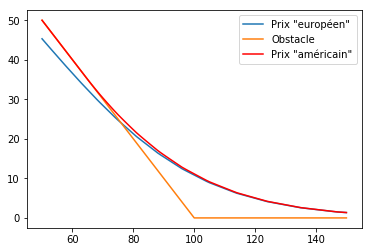

In [19]:
import matplotlib.pyplot as plt;

def main_3():
    # tracé de courbes
    N=50
    sigma=0.3
    p=1/2;d=1-sigma/math.sqrt(N);u=1+sigma/math.sqrt(N);
    K=100;x_0=100;
    r_0=0.1;
    r=r_0/N;

    def gain_put(x): return max(K-x,0) # Payoff du put  
    def gain_call(x): return max(x-K,0) # Payoff du call 
  
    vmin=50;
    vmax=150;   
    courbe_am=np.zeros(vmax-vmin+1)
    courbe_eu=np.zeros(vmax-vmin+1)
    obstacle=np.zeros(vmax-vmin+1)

    n=0;
    x=range(vmin,vmax+1,1)
    for current_x in x:
        #courbe_am[n]= le prix américain en current_x
        #courbe_eu[n]= le prix européen en current_x
        #obstacle[n] = l'obstacle en current_x
        
        ######  A vous de jouer  .....

        n=n+1; 
        
    # On compare les courbes "Américaines" et "Européennes"
    plt.plot(x,courbe_eu,label='Prix "européen"')
    plt.plot(x,obstacle,label='Obstacle')
    plt.plot(x,courbe_am,color='red',label='Prix "américain"')
    plt.legend(loc='upper right')

main_3()

__Question 2.6.__ Regardez comment le prix évolue au fils du temps~: tracez les
  courbes $x\to v(n,x)$, pour $n=0,2,5,20,50$. Ce prix est égal à $(K-x)_+$ en zéro, il croit avec $n$.

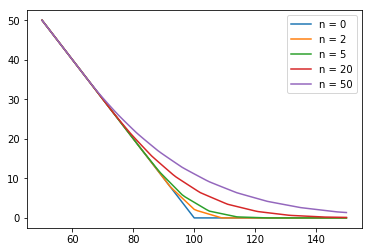

In [20]:
import matplotlib.pyplot as plt

def main_4():
    sigma=0.3;
    K=100;x_0=100;

    N=50;
    p=1/2;d=1-sigma/math.sqrt(N);u=1+sigma/math.sqrt(N);
    r_0=0.1;r=r_0/N;

    def gain_put(x): return max(K-x,0) # Payoff du put  
    def gain_call(x): return max(x-K,0) # Payoff du call 

    vmin=50;vmax=150;
    # évolution de la courbe en fonction de n
    liste=[0,2,5,20,50]
    courbe_am=np.zeros([np.size(liste),vmax-vmin+1])
    index_n=0
    x=range(vmin,vmax+1,1)
    for N in liste:
        i=0;
        # construction de la courbe de prix si l'echéance est N
        for current_x in x:
            
            # courbe_am[index_n,i] = prix du put en current_x si l'echéance est N
        
            ######  A vous de jouer  .....

            i=i+1
        index_n=index_n+1
    
    for n in range(index_n):
        text='n = '+str(liste[n])
        plt.plot(x,courbe_am[n,:],label=text)
    plt.legend(loc='upper right')
        
main_4()

__Question 2.7__ Que constatez vous lorsque $N$ augmente ($N=10,100,200,500$) et
  que l'on choisit $r$, $u$ et $d$ en fonction de $N$ comme définis
  plus haut ($r=r_0/N$, $d=1-\sigma/\sqrt{N}$, $u=1+\sigma/\sqrt{N}$).
  
__Commentaire:__ lorsque $N$ tend vers $+\infty$ dans ces
  conditions, les prix convergent vers le prix d'un modèle continu (le
  célèbre modèle de Black et Scholes).  Dans le cas européen, le
  résultat se prouve grâce au théorème de la limite centrale (cours 
  du premier semestre). Dans le cas américain qui nous intéresse, c'est 
  plus compliqué, mais ca reste vrai !

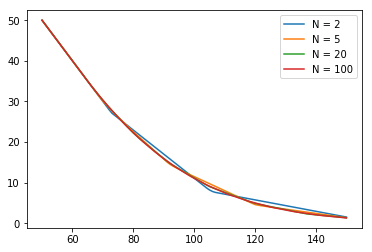

In [21]:
def main_5():
    # Avec cet algorithme on peut augmenter N
    # mais il faut renormaliser convenablement u et d pour obtenir une convergence.
    # Essayer avec N=10,100,200,...,1000

    sigma=0.3
    K=100
    x_0=100
    r_0=0.1
    p=1/2
    N=50

    def gain_put(x): return max(K-x,0) # Payoff du put  

    vmin=50;vmax=150;
    courbe=np.zeros(vmax-vmin+1)
    x=range(vmin,vmax+1,1)
    for N in [2,5,20,100]:
        # Une renormalisation convenable
        # pour converger vers un modèle de Black et Scholes
        r=r_0/N;
        d=1-sigma/math.sqrt(N);
        u=1+sigma/math.sqrt(N);
        n=0;
        for current_x in x:
            text='N = '+str(N)
 
            # courbe[n]= prix américain avec les paramètres r,d,u

            ######  A vous de jouer  .....

            n=n+1; 
        plt.plot(x,courbe,label=text);
    plt.legend(loc='upper right')

main_5()

# Simulation selon la loi du temps optimal

On va chercher à se faire une idée du temps d'exercice optimal en simulant sa loi. On verra que cette loi a des formes variées en fonction de la valeur initiale.

__Question 2.8__ Ecrire une fonction qui simule le vecteur
  $(Bin(0),Bin(1),\ldots,Bin(N))$ du nombre de piles cumulé successif dans des $N$
  tirages à pile ou face $(p,1-p)$. Par convention $Bin(0)=0$.

  Le vecteur $Bin$ permet d'exprimer $X(n)$, la valeur en $n$ du modèle de Cox-Ross, sous la forme:
  $$
   X(n)=x_0 u^{Bin(n)} d^{n-Bin(n)}.
  $$

In [68]:
def simul_bin(N,p):
# sommes partielles du nombre de tirages "up" (=u) 
# dans N tirages à pile ou face (p,1-p)

    unif=np.random.rand(N+1) # N+1 tirages uniformes dans [0,1], on n'utilise pas le tirage "0"
    Bin=np.zeros(N+1,dtype=int) 
    # Bin(0)=0, on commence donc a n=1 
    for n in range(1,N+1):# range(1,N+1) = 1, ..., N
        # tirages a pile ou face (p,1-p)
 
        # On cumule des tirages de Bernouilli successifs

        ######  A vous de jouer  .....

    return Bin;

# simul_bin(5,1/2) est un vecteur de dimension 6 : Bin(0),...,Bin(5). Bin(0) vaut toujours 0.
print(simul_bin(5,1/2))

[0 1 1 2 3 4]


__Question 2.9__ Calculer la prix américain en conservant dans un vecteur $V(n,k)$ les valeurs en l'instant $n$ et au point $X[k]=x_0 u^{k} d^{n-k}$. $k$ varie de $0$ à $n$. Il suffit de modifier legérement l'algorithme de la __question 2.3__ en stockant les valeurs.

In [69]:
def prix_am_vect(x_0,r,u,d,p,N,gain):
# On calcule les valeurs de "v(n,x)" (voir question précédente)
# mais, ici, on les conserve dans un vecteur "V"
# ce qui évitera d'avoir à les re-calculer un grand 
# nombre de fois lors des simulations.
    V=np.zeros([N+1,N+1])
    for k in range(N+1):
        x=x_0 * u**k * d**(N-k) # le point de calcul
        V[N,k]=gain(x) # Valeur de U en N

    for n in range(N-1,-1,-1): # le temps decroit de N-1 a 0
        for k in range(n+1): # k varie de 0 a n
            x = x_0 * u**k * d**(n-k) # le point de calcul
 
            # V[n,k]= ...

            ######  A vous de jouer  .....

    return V

__Question 2.10__ A partir d'une trajectoire du modèle de Cox-Ross donnée par le vecteur
  $Bin$ et des valeurs de $V$ précédemment calculées, évaluer le
  temps d'arrêt optimal associé à cette trajectoire. 
  
  Pour des raisons techniques, on est obligé de rajouter "& (gain_immediat > 0)" à la condition 
  d'exercice classique (le gain immediat = la valeur courrante de $v$). Cette condition est naturelle, 
  puisque si le gain immédiat est nul, on n'a aucun intérêt à exercer en cet instant, bien sûr.

In [70]:
def temps_optimal_option(x_0,u,d,Bin,V,gain):
    # Bin est la somme cumulée de tirages de Bernouilli indépendants
    # Calcule le temps d'arrêt optimal associé à la trajectoire 
    # (X(0),X(1),...,X(N)) où  X(n) = x_0 * u**Bin(n) * d**(n-Bin(n))

    for n in range(np.size(Bin)):
        x_n=x_0 * u**Bin[n] * d**(n-Bin[n]) # Valeur de X(n) pour ce tirage
        Valeur = V[n,Bin[n]] # Calcul de V(n,X(n)) que l'on a pre-calculé
        gain_immediat = gain(x_n) # le gain si on exerce en n
         
        # condition d'exercice
        # if (...) & (gain_immediat > 0) : return n
        
        ######  A vous de jouer  .....

    return N

  Voici un programme qui permet de tracer des histogrammes. 

In [71]:
def histo_discret(samples, maxsize,titre):
# histogramme de tirages selon une loi discrète à valeurs entières
# supposé prendre des valeurs entre 0 et maxsize.
    size, scale = 20000, 100
    my_histo = pd.Series(samples)
    my_histo.plot.hist(grid=True, bins=maxsize+1, rwidth=2, color='#607c8e',range=[0,maxsize])
    plt.title(' ')
    plt.xlabel(titre)
    plt.ylabel(' ')
    plt.grid(axis='y', alpha=1)

Simuler un grand nombre de trajectoires du modèle de Cox-Ross et
  les valeurs des temps d'arrêt associés à ces trajectoires.  Tracer
  un histogramme de la loi du temps d'arrêt optimal.  Faire varier les
  valeurs de $x_0$ ($x_0=60,70,80,100,120)$) et voir l'influence de
  ce choix sur le loi du temps d'arrêt optimal.

In [77]:
def un_test(x_0,N):
    # paramètres du modèle et de l'option
    sigma=0.3
    p=1/2;d=1-sigma/math.sqrt(N);u=1+sigma/math.sqrt(N)
    K=100
    r_0=0.1
    r=r_0/N
    # payoff (ou gain) de l'option put
    def gain_put(x): return max(K-x,0) 

    # calcul de la fonction v
    V=prix_am_vect(x_0,r,u,d,p,N,gain_put)

    # "Nbre" tirages selon la loi du temps d'arrêt optimal
    Nbre=1000;
    tau=np.zeros(Nbre,dtype=int)
    for j in range(Nbre):
         
        # commencez par simuler des Bernouillis cumulées (voir plus haut),
        # puis en déduire un tirage selon la loi du temps d'arrêt optimal
        
        ######  A vous de jouer  .....

    histo_discret(tau,N,'Temps optimal')

Expérimenter pour diverses valeurs de $x_0$. On vous suggère $x_0=K=100$, puis $x_0=60, 70, 80, 100, 120$. Vous constaterez que la loi de $\tau$ varie considérablement.

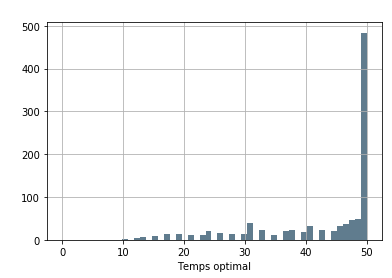

In [78]:
# un test simple "at the money" |$(K=x_0)$|
N=50
x_0=100;tau=un_test(x_0,N)

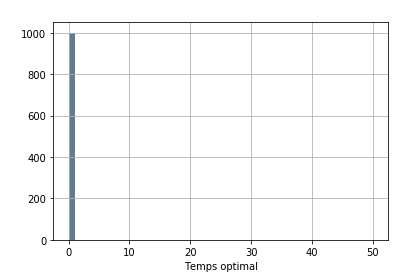

In [79]:
    N=50
    x_0=60;tau=un_test(x_0,N) # lorsque x_0 << K, on exerce toujours en 0

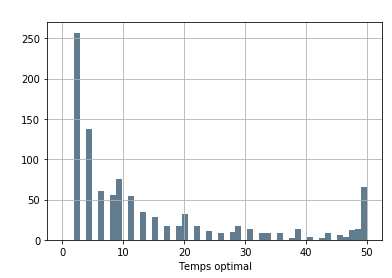

In [80]:
    N=50
    x_0=70;tau=un_test(x_0,N) # on augmente x_0, on n'exerce plus (jamais) en 0

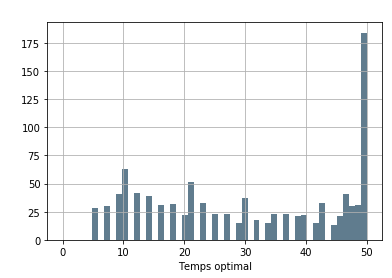

In [81]:
N=50
x_0=80;tau=un_test(x_0,N) # On exerce de plus en plus tard ...

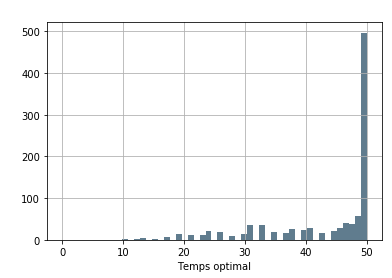

In [82]:
N=50
x_0=100;tau=un_test(x_0,N)

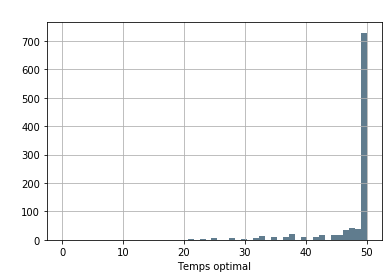

In [83]:
N=50
x_0=120;tau=un_test(x_0,N) # Le plus souvent en N

 __Question 2.11__ Le cas du call (l'option dont le gain instantané vaut $(x-K)_+$) est très particulier. On peut montrer que dans ce cas, l'option ne s'exerce qu'à échéance. On le vérifie, ici, par simulation.

In [84]:
# Teste le cas du call (x-K)_+
# qui ne s'exerce jamais avant l'écheance N.
# Le fait que le prix eu du call soit toujours plus grand 
# que l'obstacle permet de le prouver rigoureusement (pourquoi?).
  
def main_8():
    sigma=0.3; r_0=0.1
    K=100;x_0=100
    N=50
    r=r_0/N
    u=(1+r)*math.exp(sigma/math.sqrt(N));d=(1+r)*math.exp(-sigma/math.sqrt(N))
    p=1/2;  #p= (1+r-d)/(u-d); # en principe pour Cox-Ross
    
    def gain_call(x): return max(x-K,0) # Payoff du call 
 
    V_call=prix_am_vect(x_0,r,u,d,p,N,gain_call)
    Nbre=1000
    tau=np.zeros(Nbre)
    for j in range(Nbre):
        Bin=simul_bin(N,p)
        tau[j]=temps_optimal_option(x_0,u,d,Bin,V_call,gain_call)
    histo_discret(tau,N,'Temps optimal')

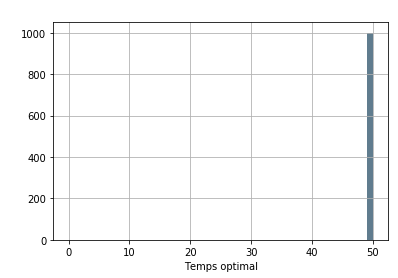

In [85]:
main_8() # un call sans dividende s'exerce toujours à l'instant N

__Question 2.12__ Probabilité d'exercice anticipé.

 Évaluer la probabilité d'exercice anticipé (i.e. $\P(\tau < N)$,
  si $\tau$ est le temps d'arrêt optimal. Vérifier par simulation que
  cette probabilité est strictement positive (pour le put). Elle décroit en fonction de $x_0$.

In [86]:
def compute_proba(x_0,N):
    # Proba que tau<N
    sigma=0.3;
    p=1/2;d=1-sigma/math.sqrt(N);u=1+sigma/math.sqrt(N)
    K=100
    r_0=0.1
    r=r_0/N
 
    def gain_put(x): return max(K-x,0) # Payoff du put  

    V=prix_am_vect(x_0,r,u,d,p,N,gain_put);

    Nbre=1000;
    tau=np.zeros(Nbre,dtype=int)
    for j in range(Nbre):
        Bin=simul_bin(N,p)
        tau[j]=temps_optimal_option(x_0,u,d,Bin,V,gain_put)
    
    res=0
    for j in range(Nbre):
         
        # exprimer le condition d'exercice anticipé (tau est strictement inferieur à N)
        
        ######  A vous de jouer  .....

    return res / Nbre

def main_9():
    N = 50
    for x_0 in [60,70,80,100,120]:
         print("x_0 =",x_0,": proba d'exercice = ",compute_proba(x_0,N))

In [87]:
main_9()

x_0 = 60 : proba d'exercice =  1.0
x_0 = 70 : proba d'exercice =  0.937
x_0 = 80 : proba d'exercice =  0.805
x_0 = 100 : proba d'exercice =  0.533
x_0 = 120 : proba d'exercice =  0.271


__Question 2.12__ Tracer la frontière d'exercice en fonction du temps. 

C'est la courbe $n\to s(n)$ telle que $V(n,x) > (K-x)_+$ si et seulement si $x>s(n)$. Autrement 
dit le point où $V(n,x)$ se détache de $(K-x)_+$.

On doit exercer l'option lorsque $X_n < s(n)$, attendre sinon.

Pour mieux comprendre, consulter le dessin correspondant à la __question 2.5__.

In [88]:
def frontiere(N,x_0,u,d,V,gain):
    # Calcule la frontière d'exercice t -> s(t) t\in[0,N]
    # à partir du tableau V[n,j]
    s=np.zeros(N+1);
    for n in range(N):
        for k in range(n+1):
            # Dans le cas du put, on cherche le premier point ou le prix est strictement 
            # supérieur au gain immédiat. 
            x=x_0*u**k *d**(n-k);
        
            ######  A vous de jouer  .....

    # Le cas n=N est particulier (puisque V[N,j] est exactement égal à gain(x_j)),
    # on prolonge avec la valeur précédente pour avoir un beau dessin.
    s[N]=s[N-1] 
    return s

def main_10(): 
    N=1000;
    r_0=0.05;r=r_0/N;
    sigma=0.3;
    K=100;
    x_0=60;# pour avoir un joli dessin sans artéfacts, 
           # il est préférable de partir d'une valeur x_0 proche de la valeur de la fontière en 0.
           # Vous pouvez expérimenter avec d'autres valeurs plus petites et plus grande 
           # chercher à interpréter ce qui se passe. Ce n'est pas si facile ...
    p=1/2;d=1-sigma/math.sqrt(N);u=1+sigma/math.sqrt(N);
    def gain_put(x): return max(K-x,0) # Payoff du put  

    V=prix_am_vect(x_0,r,u,d,p,N,gain_put);
    front=frontiere(N,x_0,u,d,V,gain_put);
    plt.plot(front,label='frontière');
    plt.legend(loc='upper right')


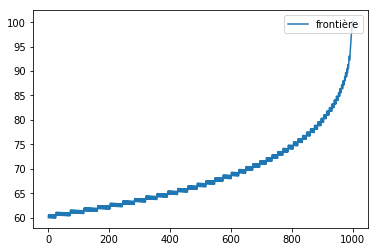

In [89]:
main_10()

# 3. Un problème de recrutement

On reçoit, consécutivement, $N$ candidats à un poste. Les
circonstances m'imposent de décider tout de suite du recrutement (soit
on recrute la personne que l'on vient de recevoir, soit on la refuse
définitivement). On cherche à maximiser la proabilité de recruter le
meilleur candidat. Quelle est la meilleure stratégie ?

On a vu en cours que l'on peut se ramener à $(S_1,\ldots,S_N)$ est une
suite de variables aléatoires indépendantes de Bernouilli $1/n$, qui
est une chaîne de Markov sur l'espace $E=\{0,1\}$, non homogène, de
matrice de transition, dépendant du temps, $P_n$
$$
\begin{array}{lcl}
  P_n(0,0)&=&P_n(1,0)=1-\frac{1}{n+1}=\frac{n}{n+1},\\
  P_n(0,1)&=&P_n(1,1)=\frac{1}{n+1}.
\end{array}
$$
On chercher à maximiser $\P(\tau\;\mbox{ est le
  meilleur})=\E\left(\frac{\tau}{N} S_\tau\right)$ (voir les transparents pour une preuve) parmi tous les
temps d'arrêt.

__Question 3.1__ Ecrire un programme _Python_ qui calcule la solution
  $(u(n,0\mbox{ ou } 1),0\leq n \leq N)$ de l'équation de
  programmation dynamique donnée par (voir cours)
  $$
  \left\{
    \begin{array}{l}
      u(n,x) = \max\Big\{ \frac{n}{n+1} u(n+1,0) + \frac{1}{n+1} u(n+1,1),\frac{n}{N} x\Big\}, n<N,\\
      u(N,x) = x,
    \end{array}
  \right.   
  $$
  On calcule $(u(n,\{0,1\}),0\leq n \leq N)$ à l'aide de l'équation de
  programmation dynamique. On désigne l'"obstacle" par $(f(n,\{0,1\}),0\leq n \leq N)$.
  Notez que $f(n,0)=0$ et $f(n,1)=n/N$.


In [90]:
  def compute_u(N):
    u=np.zeros([N+1,2]);
    u[N,0]=0;u[N,1]=1; # initialisation des valeurs terminales en N
    for n in range(N-1,-1,-1): # = N-1,N-2, ..., 0
         
        # écrire l'équation précédente.
        
        ######  A vous de jouer  .....

        
    return u

 __Question 3.2__ Tracer les courbes $u(n,0)$, $u(n,1)$ ainsi que "l'obstacle"
  $f(n,1)=\frac{n}{N}$. 

In [91]:
def main_11():
    N=1000;
    obstacle=np.zeros(N+1)
    for k in range(N+1):
        obstacle[k]=k/N;

    u=compute_u(N);
    plt.plot(range(N+1),u[:,0],label='valeur pour x=0');# u(n,0)
    plt.plot(range(N+1),obstacle,label='obstacle');
    plt.plot(range(N+1),u[:,1],label='valeur pour x=1');# u(n,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


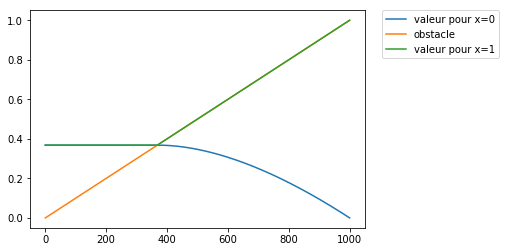

In [179]:
main_11()

__Question 3.3__ Interprétez $u(n=0,s=1)$ comme la probabilité de choisir
le meilleur candidat avec la stratégie optimale. Tracer la courbe
$N$ donne
$$
  \P(\mbox{Le candidat choisi par une stratégie optimale est le
    meilleur}),
$$
pour $N=10,25,50,100,250,500,1000$. Vérifier numériquement qu'elle converge vers $1/e\approx 37\%$.
  

In [180]:
def main_12():
    # u(0,1) = P(succés pour la stratégie optimale)
    # On vérifie que cette proba tends vers 1/e ~ 37\%
    valeurs=[10,15,20,25,30,40,50,60,70,80,100,150,200,250,500,1000];
    courbe=np.zeros(np.size(valeurs));

    i=0;
    for N in valeurs:
         
        # calculer la probabilité d'obtenir le meilleur, avec la stratégie optimale, pour N candidats
        
        ######  A vous de jouer  .....

        i=i+1;

    plt.plot(valeurs,courbe)

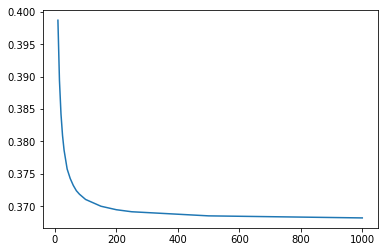

In [181]:
main_12()

# Calcul et simulation du temps d'arrêt optimal

Vérifier que l'on a $u(n,0) > 0$ pour tout $n<N$ et donc que
$0=f(n,0)\not=u(n,0)$. Par ailleurs, on a bien sûr, $u(N,0)=0=f(N,0)$.

Nous savons (voir le cours) qu'un temps d'arret optimal est donné par
  $$
  \tau = \inf\{n\geq 0, u(n,S_n)=f(n,S_n)\}.
  $$
Se convaincre, à partir de cette formule, que le temps optimal $\tau$ sera toujours 
postérieur à $\tau_{min}$, le premier temps où $u(n,1)=f(n,1)=n/N$, (puisque, pour $n<N$, 
$u(n,0) > 0 = f(n,0)$, et le temps optimal ne peut donc être atteint avec $S_n=0$ lorsque $n<N$). 

Le temps d'arrêt optimal $\tau$ sera donc la premier instant après $\tau_{min}$ ($\tau_{min}$ compris) 
pour lequel $S_n=1$ et $u(n,1)=n/N$ si $n<N$.

Dans le cas où $S_n=0$ pour tous les $n$ entre $\tau_{min}$ et $N$, on est obligé de choisir
$\tau=N$.

__Question 3.4__ 
Ecrire un algorithme de calcul du temps (déterministe) $\tau_{min}$.

In [182]:
  def temps_min(N):
    # Calcule le
    # premier temps où |$u(n,1)=f(n,1)=n/N$|
    # à |$\epsilon$| près.
    epsilon= 0.00001;
    u=compute_u(N);
    for n in range(N+1):
        if (abs(u[n,1] - (n/N)) < epsilon): break;
    return n;

__Question 3.5__ Vérifier par simulation que le temps (déterministe) $\tau_{min}$ "vaut environ"
  $N/e$ pour $N$ grand.  On peut le démontrer "sans trop de difficulté"
  à l'aide de la série harmonique. On se contente de le vérifier numériquement ici.

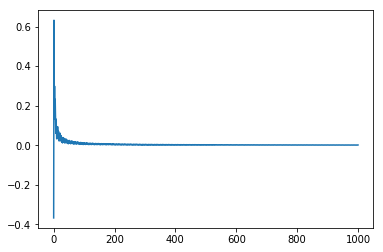

In [183]:
def main_13():
    # Vérification que temps_min vaut environ |$N/e$|.
    Taille=1000;
    x=np.zeros(Taille+1)
    for N in range(1,Taille+1):
        x[N]=temps_min(N)/N;
    e=math.exp(1)
    x=x-1/e;
    plt.plot(range(Taille+1),x);
    
main_13()

Ecrire une fonction qui calcule la suite des rangs d'insertion ($R$ dans le cours)
  d'une permutation et une fonction qui calcule la permutation
  définie par ses rangs d'insertion successifs.

In [184]:
def Omega2R(omega):
# Calcule les rangs d'insertion d'une permutation omega donnée
    R=np.zeros(np.size(omega),dtype=int) # crée u tableau d'entier
    for n in range(np.size(omega)):
        # classe le vecteur omega[1,...,n] en croissant
        y=np.sort(omega[0:n+1]);
        # R(n) = le classement de omega(n) parmi les n premiers
        R[n]=np.where(y==omega[n])[0][0]+1
    return R

def R2Omega(R):
    # Calcule omega connaissant les rangs d'insertion
    iomega=np.zeros(0,dtype=int);# crée u tableau d'entier
    for n in range(np.size(R)):
        # J'insére n à l'indice R[n]
        iomega=np.concatenate([iomega[0:int(R[n]-1)],[n+1],iomega[int(R[n]-1):n+1]])
    # On inverse la permutation
    omega=np.zeros(np.size(R),dtype=int)# crée u tableau d'entier
    for n in range(np.size(omega)):
        omega[int(iomega[n]-1)]=int(n+1)
    return omega

def main_14():
    # test sur une permutation
    N=10
    omega=np.random.permutation(N)+1# tirage d'une permutation aléatoire.
    R=Omega2R(omega)
    print("rangs d'insertion: ",R)
    
    # Retrouve t'on omega ?
    omega2=R2Omega(R)
    print(omega,end='')
    print(' ?=? ',end='')
    print(omega2)

main_14()

rangs d'insertion:  [1 2 2 1 1 6 3 7 9 1]
[ 5  7  6  3  2  9  4  8 10  1] ?=? [ 5  7  6  3  2  9  4  8 10  1]


 __Question 3.6__ Vérifier par simulation que la probabilité d'obtenir le meilleur
  candidat, lorsque l'on utilise la stratégie optimale, est de l'ordre
  de $1/e\approx 37\%$. Ce qui n'est pas génial, mais c'est le mieux
  que l'on puisse faire (sans connaitre l'avenir!).

In [185]:
def temps_optimal(omega,N):
# Calcule le temps d'arret optimum
# pour la permutation |$\omega$| 

    # Calcule la suite R à partir de omega (omega->R)
    R=Omega2R(omega);
    # calcul de tau_min
    u=compute_u(N);
    tau_min=temps_min(N);
    # Le temps optimal se situe après tau_min et c'est le premier instant
    # où R(n)=S(n)=1 apres ce temps, sauf si n=N, auquel cas on est oblige
    # de prendre le dernier candidat.
    for n in range(tau_min,N+1): # = tau_min, tau_min+1, ... , N
        if R[n-1]==1: # n-1 parce que les indices de R varie de 0 a n-1
            if u[n,1] == n/N: # à vrai dire cette condition n'est pas indispensable
                              # car après tau_min, cette égalité est forcément vérifiée
                break
    # Si on sort de cette boucle avec n=N et N est bien optimal.
    return n



On teste dans un cas particulier.

In [186]:
def main_15():
    # Verification que la probabilité d'obtenir
    # le meilleur est de l'ordre de 1/e
    N=100;
    Taille=1000;
  
    ss=0;
    for i in range(Taille):
        omega=np.random.permutation(N)+1 # on rajoute 1 pour avoir la notation classique d'une permutation
        tirages=temps_optimal(omega,N)    
        # tirages(i) est il le meilleur ?
        if (omega[int(tirages-1)]==1):  ss=ss+1;
    proba=ss/Taille;
    
    e=math.exp(1)
    p=1/e;
    print("probabilité d'obtenir le meilleur: ",proba,"~ 1/e = ",p);
    print('erreur :',abs(proba-p),'erreur Monte-Carlo maximum probable :', 1.96*math.sqrt(p*(1-p)/Taille))
                
main_15()

probabilité d'obtenir le meilleur:  0.363 ~ 1/e =  0.36787944117144233
erreur : 0.004879441171442345 erreur Monte-Carlo maximum probable : 0.02988882127355379


__Thème de réflexion 1.__ Pourquoi le problème posé avec la
    chaîne de Markov $(R_n,0\leq k\leq N)$ en lieu et place de
    $(S_n,0\leq k\leq N)$ donnerait il le même résultat ?
 

__Thème de réflexion 2.__ Pourquoi le fait de donner une note
   suivant une loi uniforme entre l'intervalle réel $[0,20]$ change le
   résultat et augmente la probabilité d'obtenir le meilleur candidat
   (bien que la loi induite sur les permutations reste la loi
   uniforme) ?